In [0]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading data


In [0]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv')

In [53]:
# Start exploring the dataset
print(data.columns)

Index([u'Time', u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9',
       u'V10', u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18',
       u'V19', u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27',
       u'V28', u'Amount', u'Class'],
      dtype='object')


In [54]:
# Print the shape of the data
print(data.shape)
#Taking just a fraction of data to learn about Local Outlier factor and isolation forest
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

# V1 - V28 are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

(284807, 31)
(28481, 31)
                Time            V1  ...        Amount         Class
count   28481.000000  28481.000000  ...  28481.000000  28481.000000
mean    94705.035216     -0.001143  ...     89.957884      0.001720
std     47584.727034      1.994661  ...    270.894630      0.041443
min         0.000000    -40.470142  ...      0.000000      0.000000
25%     53924.000000     -0.908809  ...      5.980000      0.000000
50%     84551.000000      0.031139  ...     22.350000      0.000000
75%    139392.000000      1.320048  ...     78.930000      0.000000
max    172784.000000      2.411499  ...  19656.530000      1.000000

[8 rows x 31 columns]


In [55]:
# Determine number of fraud cases in dataset
#Frauds are counted as outliers in the dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Transactions: {}'.format(len(Valid)))



0.00172341024198
Fraud Cases: 49
Valid Transactions: 28432


Plotting correlation matrix

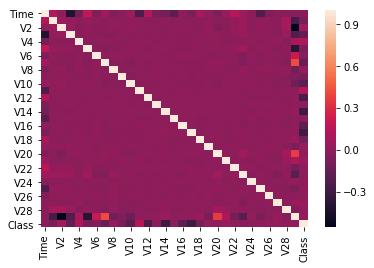

In [56]:
# Correlation matrix
corrmat = data.corr()
sns.heatmap(corrmat)
plt.show()

Seperating the label and feature

In [57]:
# Filter the columns to remove data we do not want
columns = [c for c in data.columns.tolist() if c not in ["Class"]]

X = data[columns]
y = data["Class"]

#Can also use the following notation but the above one is preferred
# X = data[data.columns[0:30]]

# Print shapes
print(X.shape)
print(y.shape)

(28481, 30)
(28481,)



**Local Outlier Factor**
The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

**Isolation Forest Algorithm**

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting 
a split value between the maximum and minimum values of the selected feature.


In [0]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

lof= LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)

**Local outlier factor**

In [59]:
y_pred = lof.fit_predict(X)

# Change the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

n_errors = (y_pred != y).sum()

# Run classification metrics
print('Number of predicted values: {}\nLocal outlier factor: {}'.format(len(y_pred),n_errors))
print('Accuracy: ',accuracy_score(y, y_pred))
print(classification_report(y, y_pred))


Number of predicted values: 28481
Local outlier factor: 97
('Accuracy: ', 0.9965942207085425)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



**Isolation Forest**

In [60]:
iso= IsolationForest(max_samples=len(X),contamination=outlier_fraction,random_state=1)

iso.fit(X)

y_pred = iso.predict(X)
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

n_errors = (y_pred != Y).sum()

# Run classification metrics
print('Isolation forest: {}'.format(n_errors))
print('Accuracy: ',accuracy_score(y, y_pred))
print(classification_report(y, y_pred))


/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation forest: 71
('Accuracy: ', 0.99750711000316)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

